In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('cleaning_data.csv')

In [3]:
df

,ID,Year_Of_Birth,Academic_Level,Income,Registration_Time,Recency,Liquor,Vegetables,Pork,Seafood,...,Complain,Gender,Phone,Year_Register,Month_Register,Total_Purchase,Payment_Method,Age,Status,Children
0,1001,1994.0,Graduation,61074.0,2021-08-17,37.0,790.0,2.0,133.0,0.0,...,0.0,Other,8.412036e+10,2021.0,8.0,31.0,Card,30.0,Married,1
1,1002,1989.0,Graduation,60093.0,2022-06-26,92.0,503.0,14.0,109.0,16.0,...,0.0,Male,8.494833e+10,2022.0,6.0,21.0,Mobile,35.0,Married,1
2,1005,1978.0,Master,79689.0,2022-05-12,65.0,312.0,28.0,640.0,180.0,...,0.0,Female,8.444028e+10,2022.0,5.0,27.0,Online,46.0,Single,0
3,1006,1987.0,Master,41021.0,2021-12-30,12.0,15.0,9.0,9.0,6.0,...,0.0,Female,8.494006e+10,2021.0,12.0,7.0,Online,37.0,Together,1
4,1008,1996.0,PhD,75032.0,2022-04-28,74.0,953.0,14.0,180.0,47.0,...,0.0,Female,8.451825e+10,2022.0,4.0,20.0,Cash,28.0,Married,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1860,9980,1992.0,Graduation,22010.0,2022-06-30,51.0,12.0,4.0,9.0,3.0,...,0.0,Male,8.464713e+10,2022.0,6.0,7.0,Online,32.0,Together,1
1861,9985,1986.0,Graduation,38361.0,2022-12-27,74.0,40.0,2.0,56.0,20.0,...,0.0,Female,8.447441e+10,2022.0,12.0,10.0,Cash,38.0,Together,1
1862,9986,1990.0,Graduation,56628.0,2023-03-21,30.0,480.0,7.0,82.0,7.0,...,0.0,Male,8.489301e+10,2023.0,3.0,20.0,Mobile,34.0,Single,1
1863,9990,1993.0,Graduation,75330.0,2021-10-04,94.0,556.0,84.0,257.0,93.0,...,0.0,Other,8.457901e+10,2021.0,10.0,29.0,Online,31.0,Married,2


* After dataset was cleaned, dataset has 31 columns and 2236 rows.

In [4]:
df.columns

Index(['ID', 'Year_Of_Birth', 'Academic_Level', 'Income', 'Registration_Time',
       'Recency', 'Liquor', 'Vegetables', 'Pork', 'Seafood', 'Candy',
       'Jewellery', 'Num_Deals_Purchases', 'Num_Web_Purchases',
       'Num_Catalog_Purchases', 'Num_Store_Purchases', 'Num_Web_Visits_Month',
       'Promo_30', 'Promo_50', 'Promo_10', 'Promo_20', 'Complain', 'Gender',
       'Phone', 'Year_Register', 'Month_Register', 'Total_Purchase',
       'Payment_Method', 'Age', 'Status', 'Children'],
      dtype='object')

## Campaign Participation

Let's evaluate campaign participation in general to find my problem in past campaignns

In [6]:
totalpromo = df[['Promo_10', 'Promo_20', 'Promo_30', 'Promo_50']].apply(pd.value_counts).transpose()

C:\Users\levob\AppData\Local\Temp\ipykernel_11952\3159367104.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  totalpromo = df[['Promo_10', 'Promo_20', 'Promo_30', 'Promo_50']].apply(pd.value_counts).transpose()


In [7]:
totalpromo

,0.0,1.0
Promo_10,1794,71
Promo_20,1844,21
Promo_30,1749,116
Promo_50,1844,21


First, we must count total participation in each campaign
* 0, as the data described before in glossary, represents that the participant **didn't** participate in the campaign.
* 1, represents that the participant did participate in the campaign. 

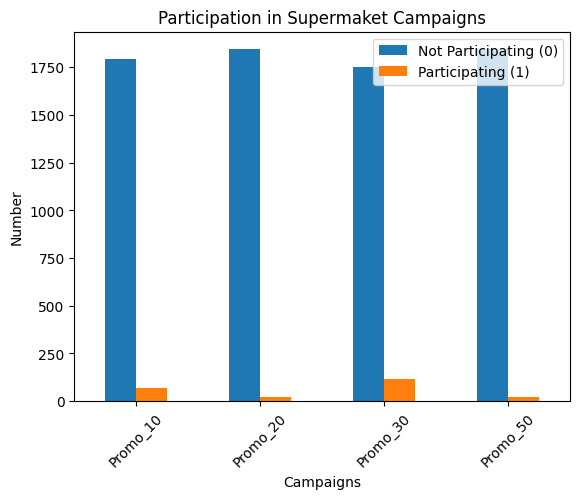

In [8]:
totalpromo.plot(kind='bar')
plt.xlabel('Campaigns')
plt.ylabel('Number')
plt.title('Participation in Supermaket Campaigns')
plt.legend(['Not Participating (0)', 'Participating (1)'])
plt.xticks(rotation = 45)
plt.show()

In [9]:
df['freqJoin'] = df[['Promo_10', 'Promo_20', 'Promo_30', 'Promo_50']].sum(axis = 1)

In [10]:
df['freqJoin'].value_counts()

freqJoin
0.0    1671
1.0     169
2.0      16
3.0       8
4.0       1
Name: count, dtype: int64

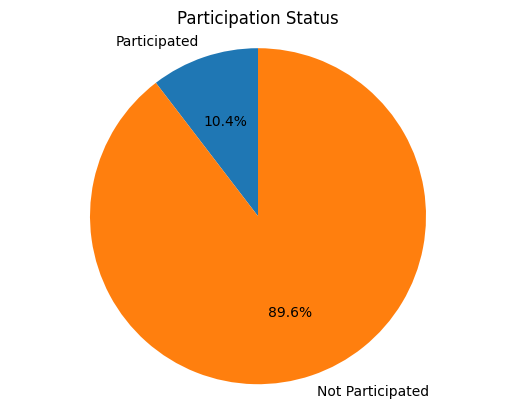

In [11]:
dictParticipated = {'type': ['Participated', 'Not Participated'],
                    'count': [df[df['freqJoin']!= 0]['ID'].count(), df[df['freqJoin'] == 0]['ID'].count()]}
hasParticipated = pd.DataFrame(dictParticipated)
plt.pie(hasParticipated['count'], labels=hasParticipated['type'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Participation Status')
plt.show()

,type,count
0,Participated,1.180412
1,Not Participated,2.819588


<Axes: >

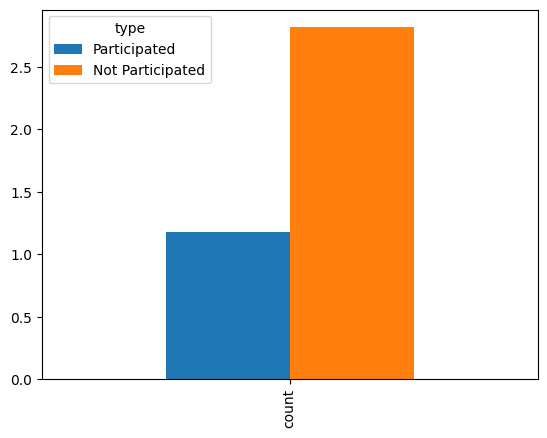

In [12]:
dictParticipationRate = {'type' : ['Participated' , 'Not Participated'],
                         'count' : [df[df['freqJoin'] != 0]['freqJoin'].mean(), 4 - df[df['freqJoin'] != 0]['freqJoin'].mean()]}
allParticipationRate = pd.DataFrame(dictParticipationRate)
display(allParticipationRate)
allParticipationRate.set_index('type').transpose().plot.bar(stacked=False)

### The Problems
**So many customers didn't participate in the campaigns and only 10.4% has participated.**
To best formulate next campaign, we should design the campaign carefully based our evaluation of past campaigns.
The Problems 

So many customers didn't participate in the campaigns. and only 10.4% has ever participated
But, if we look closely in participated customers number, there's a hope that this campaigns could work better next time. In the last campaigns, we see a significance rise in participants, doubles the last and overall past campaigns participants.

To best formulate next campaign, we should design the campaign carefully based our evaluation of past campaigns.

We should see what might happened in last campaign to formulate next campaigns. And also, looks at 2nd and 5th campaigns that failed to gather participants, so we're not repeating same mistake in next campaigns.

Based on our given data, we can see the demographics for potential target audience, so many will participate in next campaign.
We can try to integrate discount into campaign.
We can boost one of our channel of purchase for effective campaign.

>**First thing first, we should decide who's our best target audience?**

### DEMOGRAPHIC EDA
Based on our given data, we can do some demographic analysis 
We can analyze through Generation, Education, Status, Ecomonic Class, Family categories.
We will try to find what happened there based on the proportion and find the best option for each demography type.

* Income Grouping

In [13]:
def incomeGrouper(x) :
    if x > 500000 :
        return 'Upper Class'
    elif x >= 100000 and x <= 500000 :
        return 'Upper Middle Class'
    elif x >= 35000 and x < 100000 :
        return 'Lower Middle Class'
    elif x >= 16000 and x < 35000 :
        return 'Working Class'
    elif x < 16000 :
        return 'Lower Class'

In [14]:
df['ecoClass'] = df['Income'].apply(incomeGrouper)

In [15]:
df['ecoClass'].value_counts()

ecoClass
Lower Middle Class    1331
Working Class          480
Lower Class             53
Upper Middle Class       1
Name: count, dtype: int64

* Generations Class

In [16]:
from datetime import date

In [17]:
def yearDefiner(x) :
    if x <= 1924 :
        return 'Greatest Generation'
    elif x >= 1925 and x <= 1945 :
        return 'Silent Generation'
    elif x >= 1946 and x <= 1964 :
        return 'Baby Boomers'
    elif x >= 1965 and x <= 1980 :
        return 'Gen X'
    elif x >= 1981 and x <= 1996 :
        return 'Millennials'
    elif x >= 1997 and x <= 2012 :
        return 'Gen Z'
    elif x >= 2013 and x <= 2025 :
        return 'Gen A'

In [18]:
df['Generation'] = df['Year_Of_Birth'].apply(yearDefiner)

In [19]:
df['Generation'].value_counts()

Generation
Millennials    1663
Gen X           127
Gen Z            75
Name: count, dtype: int64

In [20]:

df['isChildren'] = np.where((df['Children'] == 0), 'Not Family', 'Family')

* Total Amount Spent

In [21]:
df.columns

Index(['ID', 'Year_Of_Birth', 'Academic_Level', 'Income', 'Registration_Time',
       'Recency', 'Liquor', 'Vegetables', 'Pork', 'Seafood', 'Candy',
       'Jewellery', 'Num_Deals_Purchases', 'Num_Web_Purchases',
       'Num_Catalog_Purchases', 'Num_Store_Purchases', 'Num_Web_Visits_Month',
       'Promo_30', 'Promo_50', 'Promo_10', 'Promo_20', 'Complain', 'Gender',
       'Phone', 'Year_Register', 'Month_Register', 'Total_Purchase',
       'Payment_Method', 'Age', 'Status', 'Children', 'freqJoin', 'ecoClass',
       'Generation', 'isChildren'],
      dtype='object')

In [22]:
df['TotalSpent'] = df[['Liquor','Vegetables', 'Pork', 'Seafood', 'Candy']].sum(axis = 1)


Campaign participation is the main variable in this analysis
The colums are separated based on each campaign.
Later, we should count participation in total per customer to make analysis per demography / other categories.
So, we should create a new column that contains sum participation per customer to make the analysis easier.

* Total Times Purchase

In [23]:
df['frePurchase'] = df[['Num_Deals_Purchases', 'Num_Web_Purchases', 'Num_Catalog_Purchases', 'Num_Store_Purchases']].sum(axis=1)

#### ***GENERATION***
We will try to find which generation participate most in the campaign to see the problems that happended and what are the best generation to be targeted in the next campaign.

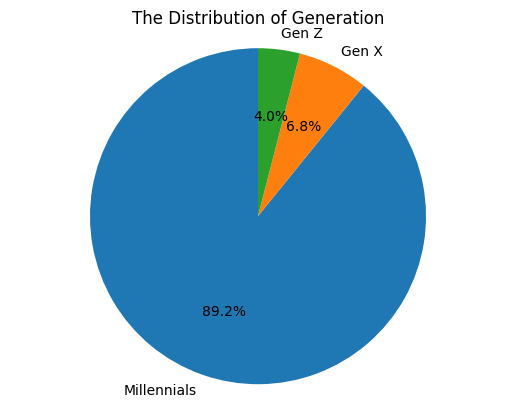

In [24]:
piegen = df['Generation'].value_counts()
piegen = pd.DataFrame(piegen).reset_index()
plt.pie(piegen['count'], labels=piegen['Generation'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('The Distribution of Generation')
plt.show()

In [25]:
piegen

,Generation,count
0,Millennials,1663
1,Gen X,127
2,Gen Z,75


**Three gen pool**
* Millennials: 89.2% with 1663 people.
* Gen X: 6.8% with 127 people.
* Gen Y: 4.0% with 75 people.

These are the most potential generation to be targeted in the next campaign

#### COMPARE PARTICIPANT IN EACH CAMPAIGN - EVALUATION 
We should look into composition of participants per campaign
This way, we can tell which is the most potential generation to target and which generation gives interest to past campaigns

In [27]:
crossTabGenCmp1 = pd.crosstab(index = df['Generation'],
                          columns= df['Promo_10']).reset_index().rename({0 : '0Cmp1', 1 : '1Cmp1'}, axis = 1)
crossTabGenCmp2 = pd.crosstab(index = df['Generation'],
                          columns= df['Promo_20']).reset_index().rename({0 : '0Cmp2', 1 : '1Cmp2'}, axis = 1)
crossTabGenCmp3 = pd.crosstab(index = df['Generation'],
                          columns= df['Promo_30']).reset_index().rename({0 : '0Cmp3', 1 : '1Cmp3'}, axis = 1)
crossTabGenCmp5 = pd.crosstab(index = df['Generation'],
                          columns= df['Promo_50']).reset_index().rename({0 : '0Cmp5', 1 : '1Cmp5'}, axis = 1)
crossTabGenCmpAll = pd.crosstab(index = df['Generation'],
                          columns= df['freqJoin'].apply(lambda x: 0 if x == 0 else 1)).reset_index().rename({0 : '0CmpAll', 1 : '1CmpAll'}, axis = 1)
crossTabGenFull = crossTabGenCmp1.merge(crossTabGenCmp2, on='Generation') \
                                .merge(crossTabGenCmp3, on='Generation') \
                                .merge(crossTabGenCmp5, on='Generation') \
                                .merge(crossTabGenCmpAll, on='Generation') 
crossTabGenFull = crossTabGenFull.merge(piegen.rename({'index' : 'Generation'}, axis = 1),'inner','Generation')
crossTabGenFull['1Cmp1Prop'] = (crossTabGenFull['1Cmp1'] / crossTabGenFull['count']) * 100
crossTabGenFull['1Cmp2Prop'] = (crossTabGenFull['1Cmp2'] / crossTabGenFull['count']) * 100
crossTabGenFull['1Cmp3Prop'] = (crossTabGenFull['1Cmp3'] / crossTabGenFull['count']) * 100
crossTabGenFull['1Cmp5Prop'] = (crossTabGenFull['1Cmp5'] / crossTabGenFull['count']) * 100
crossTabGenFull['1CmpAllProp'] = (crossTabGenFull['1CmpAll'] / crossTabGenFull['count']) * 100
crossTabGenFull

,Generation,0Cmp1,1Cmp1,0Cmp2,1Cmp2,0Cmp3,1Cmp3,0Cmp5,1Cmp5,0CmpAll,1CmpAll,count,1Cmp1Prop,1Cmp2Prop,1Cmp3Prop,1Cmp5Prop,1CmpAllProp
0,Gen X,121,6,127,0,115,12,127,0,109,18,127,4.724409,0.000000,9.448819,0.000000,14.173228
1,Gen Z,73,2,74,1,72,3,74,1,70,5,75,2.666667,1.333333,4.000000,1.333333,6.666667
2,Millennials,1600,63,1643,20,1562,101,1643,20,1492,171,1663,3.788334,1.202646,6.073361,1.202646,10.282622


Here, basically we just make a crosstabulation to count frequency of each participation per campaign
The tables are separated by 2 type of count.
The first one (left side) is count of 0 (not participated) and 1 (participated) per generation.
In the middle (count) is total population per generation. So, we can calculate the proportion of participation per generation.
The second one (right side) is proportion of participation per generation, calculated by participation count / population count per generation.

This way we can conclude which generation shape the whole campaign and which generation has more interest to the campaign.

In [290]:
crossTabGenFullPartiCount = crossTabGenFull[['Generation','1Cmp1', '1Cmp2', '1Cmp3', '1Cmp5', '1CmpAll']]
crossTabGenFullPartiCount

,Generation,1Cmp1,1Cmp2,1Cmp3,1Cmp4,1Cmp5,1CmpAll
0,Gen X,6,0,12,4,0,18
1,Gen Z,2,1,3,0,1,5
2,Millennials,63,20,101,44,20,171


In [28]:
crossTabGenFullPartiProp = crossTabGenFull[['Generation','1Cmp1Prop', '1Cmp2Prop', '1Cmp3Prop', '1Cmp5Prop', '1CmpAllProp']]
crossTabGenFullPartiProp

,Generation,1Cmp1Prop,1Cmp2Prop,1Cmp3Prop,1Cmp5Prop,1CmpAllProp
0,Gen X,4.724409,0.000000,9.448819,0.000000,14.173228
1,Gen Z,2.666667,1.333333,4.000000,1.333333,6.666667
2,Millennials,3.788334,1.202646,6.073361,1.202646,10.282622


Separate the table into two tables to make a visualization for composition of participant per campaign

* First table is count table, how much participant per campaign per generation.
This will tell which generation shape the majority of campaign participant.

* Second table is proportion table, how much proportion per generation that participated in campaigns.
This will tell which generation take interest more in the campaigns because majority of population of that generation has participated.

In [29]:
crossTabGenFullPartiCount.set_index('Generation').transpose().plot.bar(stacked = True)
plt.xticks(rotation = 45)
plt.show()

NameError: name 'crossTabGenFullPartiCount' is not defined

In [30]:
crossTabGenFullPartiCount.set_index('Generation').transpose().plot.bar(stacked = False)
plt.xticks(rotation = 45)
plt.show()

NameError: name 'crossTabGenFullPartiCount' is not defined

*Millennials* is the biggest to have participated in campaigns

#### DETAILS

*All Campaign?*

In [31]:
filtered_df = df[df['freqJoin'] != 0]
generation_counts = filtered_df['Generation'].value_counts()

In [32]:
generation_counts.reset_index()

,Generation,count
0,Millennials,171
1,Gen X,18
2,Gen Z,5


In [33]:
generation_counts = pd.merge(generation_counts, piegen, on = 'Generation', how = 'inner')

In [34]:
generation_counts

,Generation,count_x,count_y
0,Millennials,171,1663
1,Gen X,18,127
2,Gen Z,5,75


In [35]:
generation_counts['%Percent'] = generation_counts['count_x']*100/generation_counts['count_y']
generation_counts['%Percent'] = generation_counts['%Percent'].sort_values(ascending=False)

In [36]:
generation_counts

,Generation,count_x,count_y,%Percent
0,Millennials,171,1663,10.282622
1,Gen X,18,127,14.173228
2,Gen Z,5,75,6.666667


* 14.17% Gen X / 18 people of 127 people have participated
* 6.66% GenZ / 5 people of 75 people have participated
* 10.28% Millenials / 171 people of 1663 people have participated

*5th Campaign?*

In [37]:
filtered_df = df[df['Promo_50'] != 0]
generation_counts_5 = filtered_df['Generation'].value_counts()
generation_counts_5.reset_index()
generation_counts_5 = pd.merge(generation_counts_5, piegen, on = 'Generation', how = 'inner')
generation_counts_5['%Percent'] = generation_counts_5['count_x']*100/generation_counts_5['count_y']
generation_counts_5['%Percent'] = generation_counts_5['%Percent'].sort_values(ascending=False)
generation_counts_5

,Generation,count_x,count_y,%Percent
0,Millennials,20,1663,1.202646
1,Gen Z,1,75,1.333333


* 2.2 GenZ / 2 people of 91 people have participated
* 1.35 Millennials / 27 people of 1994 people have participated
* 0.66% GenX / 1 people of 151 people have participated

### OVERALL CONCLUSION OF AGE
1. Based on proportion, Millennials, Gen X has the highest proportion of general Age Demographics. Those 2 are the most potential to be digged on.
2. Most of the campaign participants, based on the proportion, always have Gen X as the highest proportion followed by Millennials and then Gen Z.
3. Gen Millennials is the largest pool of population but don't participate as much as other categories. It means, the potentiality is wasted. Meanwhile the quantity, most of the time, has Millennials as top participant quantity.
5. The 5th Campaign seems based on participant quantity, but seems not working too.
6. We still can't conclude what makes Last Campaign and the 2nd campaign failed.

#### ***EDUCATION***
We will try to find which education participate most in the campaign to see the problems that happened and what are the best education to be targeted in the next campaign

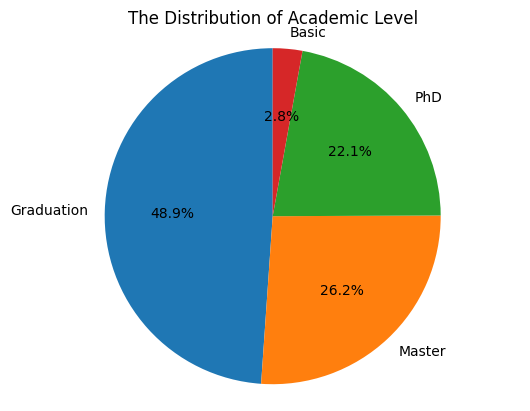

In [38]:
pieedu = df['Academic_Level'].value_counts()
pieedu = pd.DataFrame(pieedu).reset_index()
plt.pie(pieedu['count'], labels=pieedu['Academic_Level'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('The Distribution of Academic Level')
plt.show()

In [39]:
pieedu

,Academic_Level,count
0,Graduation,912
1,Master,488
2,PhD,412
3,Basic,53


*Top 3 Academic Level*
1. Graduation: 48.9% / 1126 people.
2. Master: 25.6% / 572 people.
3. PhD: 21.1% / 484 people.

These are the most potential education to be targeted in the next campaign

#### COMPARE PARTICIPANT IN EACH CAMPAIGN - EVALUATION 
* We should look into composition of participants per campaign
* This way, we can tell which is the most potential generation to target and which generation gives interest to past campaigns

In [40]:
crossTabGenCmp1 = pd.crosstab(index = df['Academic_Level'],
                          columns= df['Promo_10']).reset_index().rename({0 : '0Cmp1', 1 : '1Cmp1'}, axis = 1)
crossTabGenCmp2 = pd.crosstab(index = df['Academic_Level'],
                          columns= df['Promo_20']).reset_index().rename({0 : '0Cmp2', 1 : '1Cmp2'}, axis = 1)
crossTabGenCmp3 = pd.crosstab(index = df['Academic_Level'],
                          columns= df['Promo_30']).reset_index().rename({0 : '0Cmp3', 1 : '1Cmp3'}, axis = 1)
crossTabGenCmp5 = pd.crosstab(index = df['Academic_Level'],
                          columns= df['Promo_50']).reset_index().rename({0 : '0Cmp5', 1 : '1Cmp5'}, axis = 1)
crossTabGenCmpAll = pd.crosstab(index = df['Academic_Level'],
                          columns= df['freqJoin'].apply(lambda x: 0 if x == 0 else 1)).reset_index().rename({0 : '0CmpAll', 1 : '1CmpAll'}, axis = 1)
crossTabGenFull = crossTabGenCmp1.merge(crossTabGenCmp2, on='Academic_Level') \
                                .merge(crossTabGenCmp3, on='Academic_Level') \
                                .merge(crossTabGenCmp5, on='Academic_Level') \
                                .merge(crossTabGenCmpAll, on='Academic_Level') 
crossTabGenFull = crossTabGenFull.merge(pieedu.rename({'index' : 'Academic_Level'}, axis = 1),'inner','Academic_Level')
crossTabGenFull['1Cmp1Prop'] = (crossTabGenFull['1Cmp1'] / crossTabGenFull['count']) * 100
crossTabGenFull['1Cmp2Prop'] = (crossTabGenFull['1Cmp2'] / crossTabGenFull['count']) * 100
crossTabGenFull['1Cmp3Prop'] = (crossTabGenFull['1Cmp3'] / crossTabGenFull['count']) * 100
crossTabGenFull['1Cmp5Prop'] = (crossTabGenFull['1Cmp5'] / crossTabGenFull['count']) * 100
crossTabGenFull['1CmpAllProp'] = (crossTabGenFull['1CmpAll'] / crossTabGenFull['count']) * 100
crossTabGenFull

,Academic_Level,0Cmp1,1Cmp1,0Cmp2,1Cmp2,0Cmp3,1Cmp3,0Cmp5,1Cmp5,0CmpAll,1CmpAll,count,1Cmp1Prop,1Cmp2Prop,1Cmp3Prop,1Cmp5Prop,1CmpAllProp
0,Basic,53,0,53,0,47,6,53,0,47,6,53,0.000000,0.000000,11.320755,0.000000,11.320755
1,Graduation,877,35,902,10,859,53,902,10,819,93,912,3.837719,1.096491,5.811404,1.096491,10.197368
2,Master,473,15,485,3,459,29,485,3,445,43,488,3.073770,0.614754,5.942623,0.614754,8.811475
3,PhD,391,21,404,8,384,28,404,8,360,52,412,5.097087,1.941748,6.796117,1.941748,12.621359


Here, basically we just make a crosstabulation to count frequency of each participation per campaign
The tables are separated by 2 type of count.
The first one (left side) is count of 0 (not participated) and 1 (participated) per education.
In the middle (count) is total population per education. So, we can calculate the proportion of participation per education.
The second one (right side) is proportion of participation per education, calculated by participation count / population count per education.

This way we can conclude which education shape the whole campaign and which education has more interest to the campaign.

In [42]:
crossTabGenFullPartiCount = crossTabGenFull[['Academic_Level','1Cmp1', '1Cmp2', '1Cmp3', '1Cmp5', '1CmpAll']]
crossTabGenFullPartiCount

,Academic_Level,1Cmp1,1Cmp2,1Cmp3,1Cmp5,1CmpAll
0,Basic,0,0,6,0,6
1,Graduation,35,10,53,10,93
2,Master,15,3,29,3,43
3,PhD,21,8,28,8,52


In [43]:
crossTabGenFullPartiProp = crossTabGenFull[['Academic_Level','1Cmp1Prop', '1Cmp2Prop', '1Cmp3Prop', '1Cmp5Prop', '1CmpAllProp']]
crossTabGenFullPartiProp

,Academic_Level,1Cmp1Prop,1Cmp2Prop,1Cmp3Prop,1Cmp5Prop,1CmpAllProp
0,Basic,0.000000,0.000000,11.320755,0.000000,11.320755
1,Graduation,3.837719,1.096491,5.811404,1.096491,10.197368
2,Master,3.073770,0.614754,5.942623,0.614754,8.811475
3,PhD,5.097087,1.941748,6.796117,1.941748,12.621359


Separeate the table into two tables to make a visualization for composition of participant per campaign.

First table is count table, how much participant per campaign per education.
This will tell which education shape the majority of campaign participant.

Second table is proportion table, how much proportion per education that participated in campaigns.

This will tell which education take interest more in the campaigns because majority of population of that education has participated.


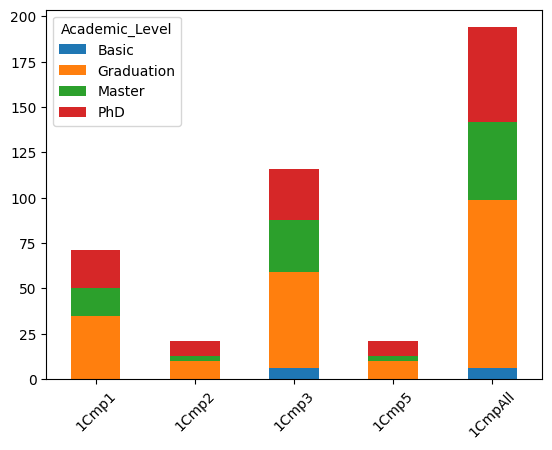

In [44]:
crossTabGenFullPartiCount.set_index('Academic_Level').transpose().plot.bar(stacked = True)
plt.xticks(rotation = 45)
plt.show()

Graduation is the biggest to have participated in Campaigns

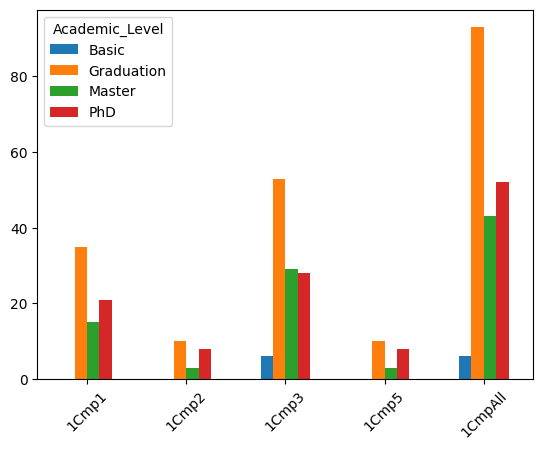

In [45]:
crossTabGenFullPartiCount.set_index('Academic_Level').transpose().plot.bar(stacked = False)
plt.xticks(rotation = 45)
plt.show()

There's no clear interest to specific education as participant, but tends towards Graduation


*All Campaign?*

In [46]:
filtered_df = df[df['freqJoin'] != 0]
generation_counts = filtered_df['Academic_Level'].value_counts()

In [47]:
generation_counts.reset_index()

,Academic_Level,count
0,Graduation,93
1,PhD,52
2,Master,43
3,Basic,6


In [48]:
generation_counts = pd.merge(generation_counts, pieedu, on = 'Academic_Level', how = 'inner')
generation_counts

,Academic_Level,count_x,count_y
0,Graduation,93,912
1,PhD,52,412
2,Master,43,488
3,Basic,6,53


In [49]:
generation_counts['%Percent'] = generation_counts['count_x']*100/generation_counts['count_y']
generation_counts['%Percent'] = generation_counts['%Percent'].sort_values(ascending=False)
generation_counts

,Academic_Level,count_x,count_y,%Percent
0,Graduation,93,912,10.197368
1,PhD,52,412,12.621359
2,Master,43,488,8.811475
3,Basic,6,53,11.320755


* 12.62% PhD / 72 people of 484 people have participated
* 10.19% Graduation / 153 people of 1126 people have participated
* 8.8% Master / 64 people of 572 people have participated

*5th Campaigns?*

In [50]:
filtered_df = df[df['Promo_50'] != 0]
generation_counts_5 = filtered_df['Academic_Level'].value_counts()
generation_counts_5.reset_index()
generation_counts_5 = pd.merge(generation_counts_5, pieedu, on = 'Academic_Level', how = 'inner')
generation_counts_5['%Percent'] = generation_counts_5['count_x']*100/generation_counts_5['count_y']
generation_counts_5['%Percent'] = generation_counts_5['%Percent'].sort_values(ascending=False)
generation_counts_5

,Academic_Level,count_x,count_y,%Percent
0,Graduation,10,912,1.096491
1,PhD,8,412,1.941748
2,Master,3,488,0.614754


* 1.94% PhD / 10 people of 484 people have participated
* 1.09% Graduation / 16 people of 1126 people have participated
* 0.6% Master / 4 people of 572 people have participated

#### **OVERALL CONCLUSION OF EDUCATION**
1. Based on proportion, Graduation, PhD, Master has the highest proportion of general Education Demographics. Those 3 are the most potential to be digged on.
2. Most of the campaign participants, based on the proportion, always have PhD as the highest proportion followed by Graduation and then Master.
3. Graduation is the largest pool of population but don't participate as much as other categories. It means, the potentiality is wasted. Meanwhile the quantity, most of the time, has Graduation as top participant quantity. 
4. Most of the campaigns seems to target PhD, but the PhD themselves are not the highest population pool.

### *STATUS MARITAL*

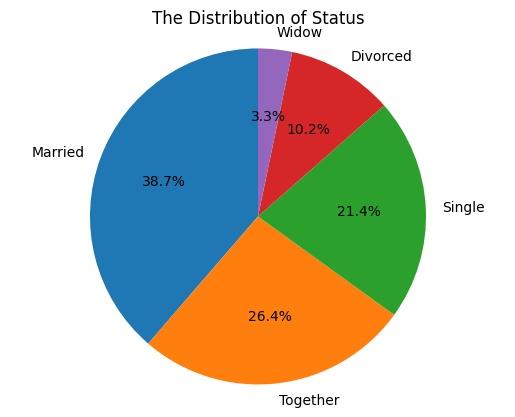

In [51]:
piestatus = df['Status'].value_counts()
piestatus = pd.DataFrame(piestatus).reset_index()
plt.pie(piestatus['count'], labels=piestatus['Status'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('The Distribution of Status')
plt.show()

In [52]:
piestatus

,Status,count
0,Married,721
1,Together,492
2,Single,400
3,Divorced,191
4,Widow,61


#### Top 3 Marital Status
* Married: 39% / 864 People
* Together: 26% / 580 People
* Single: 21% / 480 People

These are the most potential marital to be targeted in the next campaign

#### COMPARE PARTICIPANT IN EACH CAMPAIGN - EVALUATION 
* We should look into composition of participants per campaign
* This way, we can tell which is the most potential generation to target and which generation gives interest to past campaigns


In [54]:
crossTabGenCmp1 = pd.crosstab(index = df['Status'],
                          columns= df['Promo_10']).reset_index().rename({0 : '0Cmp1', 1 : '1Cmp1'}, axis = 1)
crossTabGenCmp2 = pd.crosstab(index = df['Status'],
                          columns= df['Promo_20']).reset_index().rename({0 : '0Cmp2', 1 : '1Cmp2'}, axis = 1)
crossTabGenCmp3 = pd.crosstab(index = df['Status'],
                          columns= df['Promo_30']).reset_index().rename({0 : '0Cmp3', 1 : '1Cmp3'}, axis = 1)
crossTabGenCmp5 = pd.crosstab(index = df['Status'],
                          columns= df['Promo_50']).reset_index().rename({0 : '0Cmp5', 1 : '1Cmp5'}, axis = 1)
crossTabGenCmpAll = pd.crosstab(index = df['Status'],
                          columns= df['freqJoin'].apply(lambda x: 0 if x == 0 else 1)).reset_index().rename({0 : '0CmpAll', 1 : '1CmpAll'}, axis = 1)
crossTabGenFull = crossTabGenCmp1.merge(crossTabGenCmp2, on='Status') \
                                .merge(crossTabGenCmp3, on='Status') \
                                .merge(crossTabGenCmp5, on='Status') \
                                .merge(crossTabGenCmpAll, on='Status') 
crossTabGenFull = crossTabGenFull.merge(piestatus,'inner','Status')
crossTabGenFull['1Cmp1Prop'] = (crossTabGenFull['1Cmp1'] / crossTabGenFull['count']) * 100
crossTabGenFull['1Cmp2Prop'] = (crossTabGenFull['1Cmp2'] / crossTabGenFull['count']) * 100
crossTabGenFull['1Cmp3Prop'] = (crossTabGenFull['1Cmp3'] / crossTabGenFull['count']) * 100
crossTabGenFull['1Cmp5Prop'] = (crossTabGenFull['1Cmp5'] / crossTabGenFull['count']) * 100
crossTabGenFull['1CmpAllProp'] = (crossTabGenFull['1CmpAll'] / crossTabGenFull['count']) * 100
crossTabGenFull

,Status,0Cmp1,1Cmp1,0Cmp2,1Cmp2,0Cmp3,1Cmp3,0Cmp5,1Cmp5,0CmpAll,1CmpAll,count,1Cmp1Prop,1Cmp2Prop,1Cmp3Prop,1Cmp5Prop,1CmpAllProp
0,Divorced,185,6,188,3,181,10,188,3,173,18,191,3.141361,1.570681,5.235602,1.570681,9.424084
1,Married,687,34,715,6,675,46,715,6,642,79,721,4.715673,0.832178,6.380028,0.832178,10.957004
2,Single,383,17,397,3,369,31,397,3,350,50,400,4.250000,0.750000,7.750000,0.750000,12.500000
3,Together,480,12,483,9,466,26,483,9,450,42,492,2.439024,1.829268,5.284553,1.829268,8.536585
4,Widow,59,2,61,0,58,3,61,0,56,5,61,3.278689,0.000000,4.918033,0.000000,8.196721


In [56]:
crossTabGenFull

,Status,0Cmp1,1Cmp1,0Cmp2,1Cmp2,0Cmp3,1Cmp3,0Cmp5,1Cmp5,0CmpAll,1CmpAll,count,1Cmp1Prop,1Cmp2Prop,1Cmp3Prop,1Cmp5Prop,1CmpAllProp
0,Divorced,185,6,188,3,181,10,188,3,173,18,191,3.141361,1.570681,5.235602,1.570681,9.424084
1,Married,687,34,715,6,675,46,715,6,642,79,721,4.715673,0.832178,6.380028,0.832178,10.957004
2,Single,383,17,397,3,369,31,397,3,350,50,400,4.250000,0.750000,7.750000,0.750000,12.500000
3,Together,480,12,483,9,466,26,483,9,450,42,492,2.439024,1.829268,5.284553,1.829268,8.536585
4,Widow,59,2,61,0,58,3,61,0,56,5,61,3.278689,0.000000,4.918033,0.000000,8.196721


In [57]:
crossTabGenFullPartiCount = crossTabGenFull[['Status','1Cmp1', '1Cmp2', '1Cmp3', '1Cmp5', '1CmpAll']]
crossTabGenFullPartiCount

,Status,1Cmp1,1Cmp2,1Cmp3,1Cmp5,1CmpAll
0,Divorced,6,3,10,3,18
1,Married,34,6,46,6,79
2,Single,17,3,31,3,50
3,Together,12,9,26,9,42
4,Widow,2,0,3,0,5


In [58]:
crossTabGenFullPartiProp = crossTabGenFull[['Status','1Cmp1Prop', '1Cmp2Prop', '1Cmp3Prop', '1Cmp5Prop', '1CmpAllProp']]
crossTabGenFullPartiProp

,Status,1Cmp1Prop,1Cmp2Prop,1Cmp3Prop,1Cmp5Prop,1CmpAllProp
0,Divorced,3.141361,1.570681,5.235602,1.570681,9.424084
1,Married,4.715673,0.832178,6.380028,0.832178,10.957004
2,Single,4.250000,0.750000,7.750000,0.750000,12.500000
3,Together,2.439024,1.829268,5.284553,1.829268,8.536585
4,Widow,3.278689,0.000000,4.918033,0.000000,8.196721


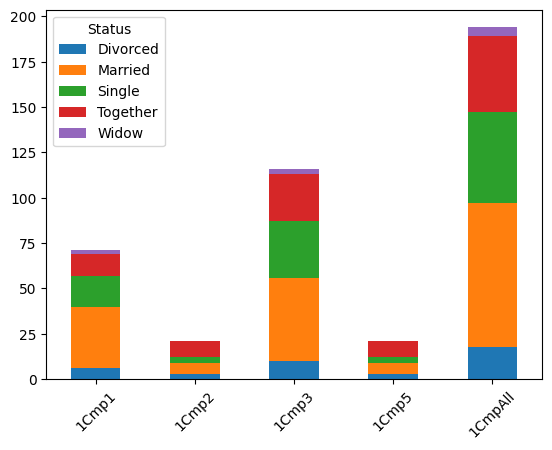

In [59]:
crossTabGenFullPartiCount.set_index('Status').transpose().plot.bar(stacked = True)
plt.xticks(rotation = 45)
plt.show()

* Most of the participant is Married
* 2nd and 5th Campaign are participated more by Together

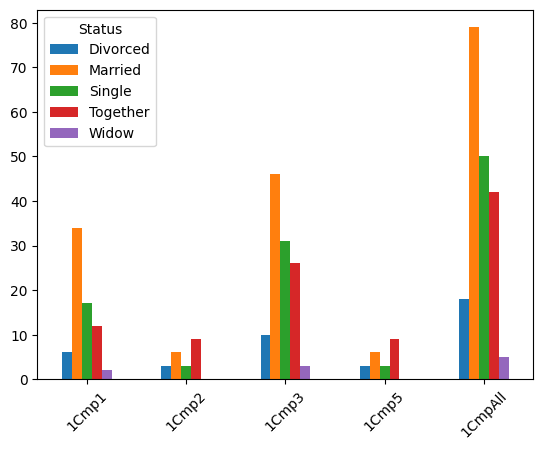

In [60]:
crossTabGenFullPartiCount.set_index('Status').transpose().plot.bar(stacked = False)
plt.xticks(rotation = 45)
plt.show()

* Based on top population, we can conclude that Married has biggest pool and shape the participant per campaign 
* But, the interest seems not clear which marital took more interest in the campaigns, but tends a bit towards Single and Together

*All Campaigns?*

In [61]:
filtered_df = df[df['freqJoin'] != 0]
generation_counts = filtered_df['Status'].value_counts()

In [62]:
generation_counts = pd.merge(generation_counts, piestatus, on = 'Status', how = 'inner')
generation_counts['%Percent'] = generation_counts['count_x']*100/generation_counts['count_y']
generation_counts['%Percent'] = generation_counts['%Percent'].sort_values(ascending=False)
generation_counts

,Status,count_x,count_y,%Percent
0,Married,79,721,10.957004
1,Single,50,400,12.500000
2,Together,42,492,8.536585
3,Divorced,18,191,9.424084
4,Widow,5,61,8.196721


* 14.07% Single / 62 people of 483 people have participated
* 13.54% Married / 117 people of 864 people have participated
* 13.36% Divorced / 31 people of 232 people have participated

*5th Campaign?*

In [63]:
filtered_df = df[df['Promo_50'] != 0]
generation_counts_5 = filtered_df['Status'].value_counts()
generation_counts_5.reset_index()
generation_counts_5 = pd.merge(generation_counts_5, piestatus, on = 'Status', how = 'inner')
generation_counts_5['%Percent'] = generation_counts_5['count_x']*100/generation_counts_5['count_y']
generation_counts_5['%Percent'] = generation_counts_5['%Percent'].sort_values(ascending=False)
generation_counts_5

,Status,count_x,count_y,%Percent
0,Together,9,492,1.829268
1,Married,6,721,0.832178
2,Single,3,400,0.750000
3,Divorced,3,191,1.570681


* 2% Together / 12 people of 580 people have particiapted 
* 0.8% Married / 7 people of 864 people have particiapted 
* 1% Single / 5 people of 480 people have particiapted 

#### OVERALL CONCLUSION OF MARITAL
1. Based on proportion, Married, Together, Single has the highest proportion of general Marital Demographics. Those 3 are the most potential to be digged on.
2. There's no clear audience targetting at marital status.
3. Married and Together can be assumed as participant who has couple. Together, they consist more than 50% of the population, being the solely highest and most potential.

### *ECONOMIC CLASS*
We will try to find which economic class participate most in the campaign to see the problems that happened and what are the best economic class to be targeted in the next campaign

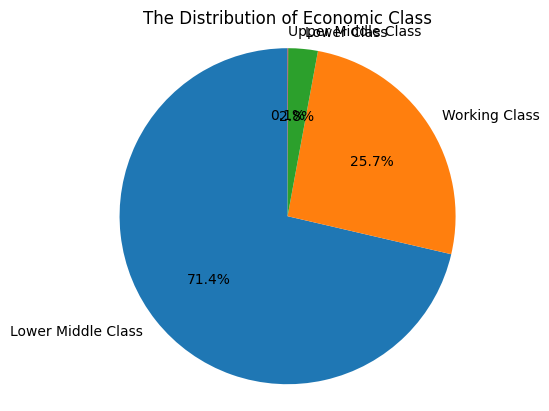

In [64]:
pieeco = df['ecoClass'].value_counts()
pieeco = pd.DataFrame(pieeco).reset_index()
plt.pie(pieeco['count'], labels=pieeco['ecoClass'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('The Distribution of Economic Class')
plt.show()

In [65]:
pieeco

,ecoClass,count
0,Lower Middle Class,1331
1,Working Class,480
2,Lower Class,53
3,Upper Middle Class,1


* Lower Middle Class: 71,4% / 1674 people 
* Working Class: 25,7% / 484 people

There are the most potential economic class to be targeted in the next campaign

#### COMPARE PARTICIPANT IN EACH CAMPAIGN - EVALUATION 
* We should look into composition of participants per campaign
* This way, we can tell which is the most potential generation to target and which generation gives interest to past campaigns


In [66]:
crossTabGenCmp1 = pd.crosstab(index = df['ecoClass'],
                          columns= df['Promo_10']).reset_index().rename({0 : '0Cmp1', 1 : '1Cmp1'}, axis = 1)
crossTabGenCmp2 = pd.crosstab(index = df['ecoClass'],
                          columns= df['Promo_20']).reset_index().rename({0 : '0Cmp2', 1 : '1Cmp2'}, axis = 1)
crossTabGenCmp3 = pd.crosstab(index = df['ecoClass'],
                          columns= df['Promo_30']).reset_index().rename({0 : '0Cmp3', 1 : '1Cmp3'}, axis = 1)
crossTabGenCmp5 = pd.crosstab(index = df['ecoClass'],
                          columns= df['Promo_50']).reset_index().rename({0 : '0Cmp5', 1 : '1Cmp5'}, axis = 1)
crossTabGenCmpAll = pd.crosstab(index = df['ecoClass'],
                          columns= df['freqJoin'].apply(lambda x: 0 if x == 0 else 1)).reset_index().rename({0 : '0CmpAll', 1 : '1CmpAll'}, axis = 1)
crossTabGenFull = crossTabGenCmp1.merge(crossTabGenCmp2, on='ecoClass') \
                                .merge(crossTabGenCmp3, on='ecoClass') \
                                .merge(crossTabGenCmp5, on='ecoClass') \
                                .merge(crossTabGenCmpAll, on='ecoClass') 
crossTabGenFull = crossTabGenFull.merge(pieeco,'inner','ecoClass')
crossTabGenFull['1Cmp1Prop'] = (crossTabGenFull['1Cmp1'] / crossTabGenFull['count']) * 100
crossTabGenFull['1Cmp2Prop'] = (crossTabGenFull['1Cmp2'] / crossTabGenFull['count']) * 100
crossTabGenFull['1Cmp3Prop'] = (crossTabGenFull['1Cmp3'] / crossTabGenFull['count']) * 100
crossTabGenFull['1Cmp5Prop'] = (crossTabGenFull['1Cmp5'] / crossTabGenFull['count']) * 100
crossTabGenFull['1CmpAllProp'] = (crossTabGenFull['1CmpAll'] / crossTabGenFull['count']) * 100
crossTabGenFull

,ecoClass,0Cmp1,1Cmp1,0Cmp2,1Cmp2,0Cmp3,1Cmp3,0Cmp5,1Cmp5,0CmpAll,1CmpAll,count,1Cmp1Prop,1Cmp2Prop,1Cmp3Prop,1Cmp5Prop,1CmpAllProp
0,Lower Class,53,0,53,0,47,6,53,0,47,6,53,0.000000,0.000000,11.320755,0.000000,11.320755
1,Lower Middle Class,1261,70,1310,21,1255,76,1310,21,1178,153,1331,5.259204,1.577761,5.709992,1.577761,11.495116
2,Upper Middle Class,0,1,1,0,1,0,1,0,0,1,1,100.000000,0.000000,0.000000,0.000000,100.000000
3,Working Class,480,0,480,0,446,34,480,0,446,34,480,0.000000,0.000000,7.083333,0.000000,7.083333


In [68]:
crossTabGenFullPartiCount = crossTabGenFull[['ecoClass','1Cmp1', '1Cmp2', '1Cmp3', '1Cmp5', '1CmpAll']]
crossTabGenFullPartiCount

,ecoClass,1Cmp1,1Cmp2,1Cmp3,1Cmp5,1CmpAll
0,Lower Class,0,0,6,0,6
1,Lower Middle Class,70,21,76,21,153
2,Upper Middle Class,1,0,0,0,1
3,Working Class,0,0,34,0,34


In [69]:
crossTabGenFullPartiProp = crossTabGenFull[['ecoClass','1Cmp1Prop', '1Cmp2Prop', '1Cmp3Prop', '1Cmp5Prop', '1CmpAllProp']]
crossTabGenFullPartiProp

,ecoClass,1Cmp1Prop,1Cmp2Prop,1Cmp3Prop,1Cmp5Prop,1CmpAllProp
0,Lower Class,0.000000,0.000000,11.320755,0.000000,11.320755
1,Lower Middle Class,5.259204,1.577761,5.709992,1.577761,11.495116
2,Upper Middle Class,100.000000,0.000000,0.000000,0.000000,100.000000
3,Working Class,0.000000,0.000000,7.083333,0.000000,7.083333


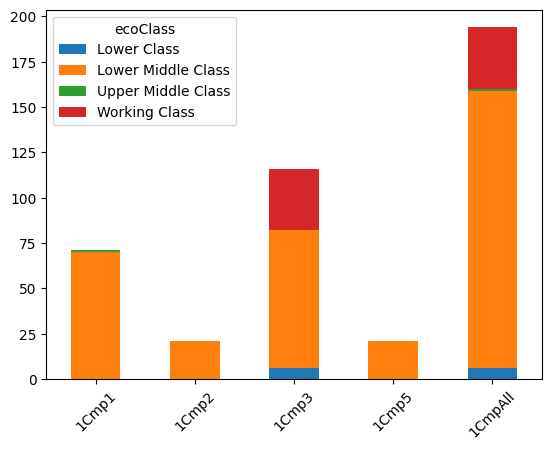

In [70]:
crossTabGenFullPartiCount.set_index('ecoClass').transpose().plot.bar(stacked = True)
plt.xticks(rotation = 45)
plt.show()

Most of the participant is Lower Middle Class

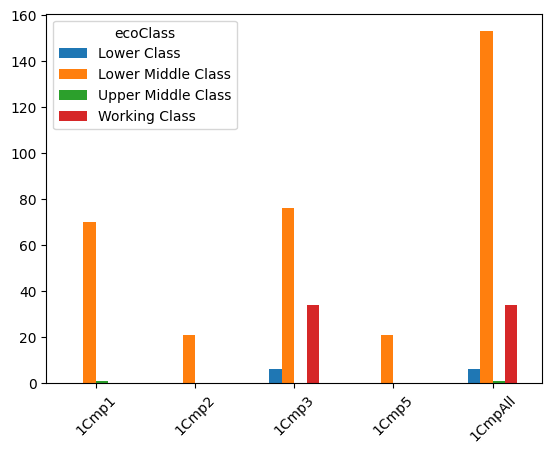

In [71]:
crossTabGenFullPartiCount.set_index('ecoClass').transpose().plot.bar(stacked = False)
plt.xticks(rotation = 45)
plt.show()

* Most of the campaign interest is towards Lower Middle Class.
* Working Class seems to have interest in 3rd campaign.
* Based on top population, we can conclude that Lower Middle Class has biggest pool and shape the participant per campaign

*All Campaigns?*

In [72]:
filtered_df = df[df['freqJoin'] != 0]
generation_counts = filtered_df['ecoClass'].value_counts()

In [73]:
generation_counts = pd.merge(generation_counts, pieeco, on = 'ecoClass', how = 'inner')
generation_counts['%Percent'] = generation_counts['count_x']*100/generation_counts['count_y']
generation_counts['%Percent'] = generation_counts['%Percent'].sort_values(ascending=False)
generation_counts

,ecoClass,count_x,count_y,%Percent
0,Lower Middle Class,153,1331,11.495116
1,Working Class,34,480,7.083333
2,Lower Class,6,53,11.320755
3,Upper Middle Class,1,1,100.000000


* 14.93% Lower Middle Class / 250 people of 1674 people have particiapted in Campaign
* 7% Working Class / 34 people of 484 people have particiapted in Campaign

In [74]:
filtered_df = df[df['Promo_50'] != 0]
generation_counts_5 = filtered_df['ecoClass'].value_counts()
generation_counts_5.reset_index()
generation_counts_5 = pd.merge(generation_counts_5, pieeco, on = 'ecoClass', how = 'inner')
generation_counts_5['%Percent'] = generation_counts_5['count_x']*100/generation_counts_5['count_y']
generation_counts_5['%Percent'] = generation_counts_5['%Percent'].sort_values(ascending=False)
generation_counts_5

,ecoClass,count_x,count_y,%Percent
0,Lower Middle Class,21,1331,1.577761


* 1.7% Lower Middle Class / 29 people of 1674 people have particiapted in Last Campaign
* 0% Working Class / 0 people of 484 people have particiapted in Last Campaign

#### OVERALL CONCLUSION OF ECONOMIC CLASS
1. Based on proportion, Lower Middle Class, Working Class have the highest proportion of general Economic Class Demographics. Those 2 are the most potential to be digged on.
2. There's a clear audience targetting at Economic Class, Lower Middle Class. But Working Class seems to participate more in 3rd and 4th campaign.

### *FAMILY*

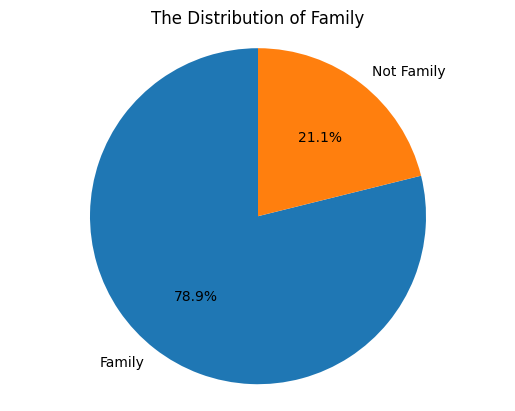

In [77]:
piefam = df['isChildren'].value_counts()
piefam = pd.DataFrame(piefam).reset_index()
plt.pie(piefam['count'], labels=piefam['isChildren'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('The Distribution of Family')
plt.show()

In [78]:
piefam

,isChildren,count
0,Family,1471
1,Not Family,394


FAMILY is the majority of population with 78.9% / 1471 People

#### COMPARE PARTICIPANT IN EACH CAMPAIGN - EVALUATION 
* We should look into composition of participants per campaign
* This way, we can tell which is the most potential generation to target and which generation gives interest to past campaigns


In [79]:
crossTabGenCmp1 = pd.crosstab(index = df['isChildren'],
                          columns= df['Promo_10']).reset_index().rename({0 : '0Cmp1', 1 : '1Cmp1'}, axis = 1)
crossTabGenCmp2 = pd.crosstab(index = df['isChildren'],
                          columns= df['Promo_20']).reset_index().rename({0 : '0Cmp2', 1 : '1Cmp2'}, axis = 1)
crossTabGenCmp3 = pd.crosstab(index = df['isChildren'],
                          columns= df['Promo_30']).reset_index().rename({0 : '0Cmp3', 1 : '1Cmp3'}, axis = 1)
crossTabGenCmp5 = pd.crosstab(index = df['isChildren'],
                          columns= df['Promo_50']).reset_index().rename({0 : '0Cmp5', 1 : '1Cmp5'}, axis = 1)
crossTabGenCmpAll = pd.crosstab(index = df['isChildren'],
                          columns= df['freqJoin'].apply(lambda x: 0 if x == 0 else 1)).reset_index().rename({0 : '0CmpAll', 1 : '1CmpAll'}, axis = 1)
crossTabGenFull = crossTabGenCmp1.merge(crossTabGenCmp2, on='isChildren') \
                                .merge(crossTabGenCmp3, on='isChildren') \
                                .merge(crossTabGenCmp5, on='isChildren') \
                                .merge(crossTabGenCmpAll, on='isChildren') 
crossTabGenFull = crossTabGenFull.merge(piefam,'inner','isChildren')
crossTabGenFull['1Cmp1Prop'] = (crossTabGenFull['1Cmp1'] / crossTabGenFull['count']) * 100
crossTabGenFull['1Cmp2Prop'] = (crossTabGenFull['1Cmp2'] / crossTabGenFull['count']) * 100
crossTabGenFull['1Cmp3Prop'] = (crossTabGenFull['1Cmp3'] / crossTabGenFull['count']) * 100
crossTabGenFull['1Cmp5Prop'] = (crossTabGenFull['1Cmp5'] / crossTabGenFull['count']) * 100
crossTabGenFull['1CmpAllProp'] = (crossTabGenFull['1CmpAll'] / crossTabGenFull['count']) * 100
crossTabGenFull

,isChildren,0Cmp1,1Cmp1,0Cmp2,1Cmp2,0Cmp3,1Cmp3,0Cmp5,1Cmp5,0CmpAll,1CmpAll,count,1Cmp1Prop,1Cmp2Prop,1Cmp3Prop,1Cmp5Prop,1CmpAllProp
0,Family,1443,28,1462,9,1373,98,1462,9,1341,130,1471,1.903467,0.611829,6.662135,0.611829,8.837525
1,Not Family,351,43,382,12,376,18,382,12,330,64,394,10.913706,3.045685,4.568528,3.045685,16.243655


In [80]:
crossTabGenFullPartiCount = crossTabGenFull[['isChildren','1Cmp1', '1Cmp2', '1Cmp3', '1Cmp5', '1CmpAll']]
crossTabGenFullPartiCount

,isChildren,1Cmp1,1Cmp2,1Cmp3,1Cmp5,1CmpAll
0,Family,28,9,98,9,130
1,Not Family,43,12,18,12,64


In [81]:
crossTabGenFullPartiProp = crossTabGenFull[['isChildren','1Cmp1Prop', '1Cmp2Prop', '1Cmp3Prop', '1Cmp5Prop', '1CmpAllProp']]
crossTabGenFullPartiProp

,isChildren,1Cmp1Prop,1Cmp2Prop,1Cmp3Prop,1Cmp5Prop,1CmpAllProp
0,Family,1.903467,0.611829,6.662135,0.611829,8.837525
1,Not Family,10.913706,3.045685,4.568528,3.045685,16.243655


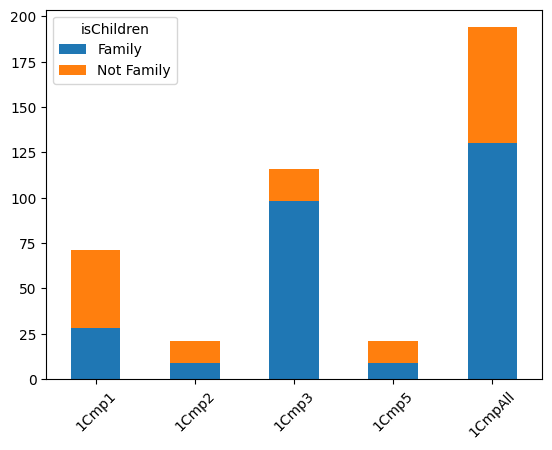

In [82]:
crossTabGenFullPartiCount.set_index('isChildren').transpose().plot.bar(stacked = True)
plt.xticks(rotation = 45)
plt.show()

FAMILY participate more than NOT FAMILY

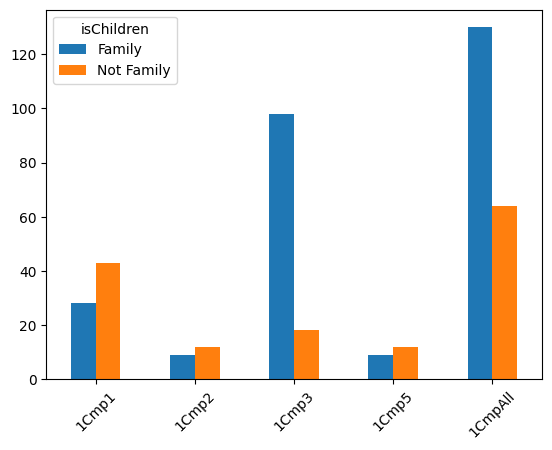

In [83]:
crossTabGenFullPartiCount.set_index('isChildren').transpose().plot.bar(stacked = False)
plt.xticks(rotation = 45)
plt.show()

The campaign seems to take interest to FAMILY and it is the biggest and potential pool.

*All Campagns?*

In [84]:
filtered_df = df[df['freqJoin'] != 0]
generation_counts = filtered_df['isChildren'].value_counts()

In [85]:
generation_counts = pd.merge(generation_counts, piefam, on = 'isChildren', how = 'inner')
generation_counts['%Percent'] = generation_counts['count_x']*100/generation_counts['count_y']
generation_counts['%Percent'] = generation_counts['%Percent'].sort_values(ascending=False)
generation_counts

,isChildren,count_x,count_y,%Percent
0,Family,130,1471,8.837525
1,Not Family,64,394,16.243655


*5th Campaign?*

In [86]:
filtered_df = df[df['Promo_50'] != 0]
generation_counts_5 = filtered_df['isChildren'].value_counts()
generation_counts_5.reset_index()
generation_counts_5 = pd.merge(generation_counts_5, piefam, on = 'isChildren', how = 'inner')
generation_counts_5['%Percent'] = generation_counts_5['count_x']*100/generation_counts_5['count_y']
generation_counts_5['%Percent'] = generation_counts_5['%Percent'].sort_values(ascending=False)
generation_counts_5

,isChildren,count_x,count_y,%Percent
0,Not Family,12,394,3.045685
1,Family,9,1471,0.611829


#### OVERALL CONCLUSION OF FAMILY
* Based on proportion, Family has the highest proportion of general Family Type Demographics. Those 2 are the most potential to be digged on.
* There's a clear audience targetting at Family Type, being Not Family. But not targeting the largest pool, which is Family.

## DEMOGRAPHIC CONCLUSION

#### Participation Rates - Evaluation
Let's see which category participate the most out of demography.
We can see it by calculating Mean for every category based on total participation. Lowest range is 0 (the category has never participated in any campaign).
Highest range is 5 (the category has always participated in all campaingns)


In [87]:
prGen = df[df['freqJoin']!=0].groupby('Generation')['freqJoin'].mean().sort_values(ascending = False)[:3].to_frame().reset_index()
prGen

,Generation,freqJoin
0,Gen Z,1.400000
1,Millennials,1.192982
2,Gen X,1.000000


<Axes: xlabel='Generation', ylabel='freqJoin'>

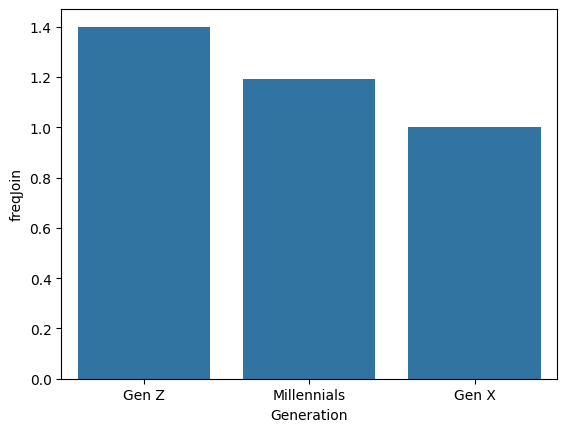

In [88]:
sns.barplot(prGen, x = 'Generation', y = 'freqJoin')

In [89]:
topGen = ['Millennials', 'Gen Z', 'Gen X']

Millenials tends to participate more in the campaign; meanwhile, Gen X is the lowest.

In [90]:
prEdu = df[df['freqJoin']!=0].groupby('Academic_Level')['freqJoin'].mean().sort_values(ascending = False)[:3].to_frame().reset_index()
prEdu

,Academic_Level,freqJoin
0,PhD,1.250000
1,Master,1.162791
2,Graduation,1.161290


<Axes: xlabel='Academic_Level', ylabel='freqJoin'>

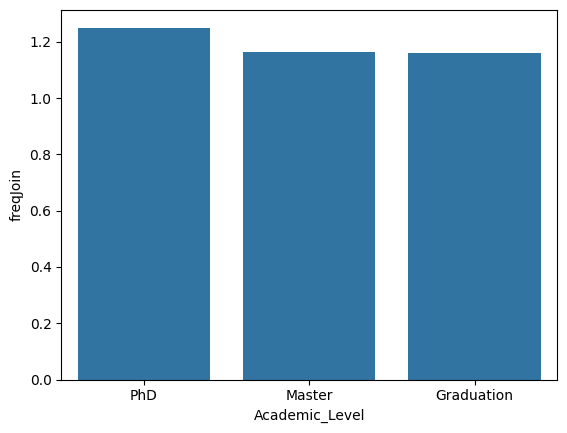

In [91]:
sns.barplot(prEdu, x = 'Academic_Level', y = 'freqJoin')

In [92]:
topEdu = ['PhD','Graduation','Master']

PhD tends to participate more in the campaign; meanwhile, Graduation is the lowest.

In [93]:
prSta = df[df['freqJoin']!=0].groupby('Status')['freqJoin'].mean().sort_values(ascending = False).to_frame().reset_index()
prSta

,Status,freqJoin
0,Together,1.333333
1,Divorced,1.222222
2,Married,1.164557
3,Single,1.080000
4,Widow,1.000000


In [94]:
topMarital = ['Single','Married','Together']

Maried tends to participate more in the campaign;
meanwhile, Maried is the lowest.But, if we assume Married and Together is the same, Single is the smallest

In [95]:
preco = df[df['freqJoin']!=0].groupby('ecoClass')['freqJoin'].mean().sort_values(ascending = False).to_frame().reset_index()
preco

,ecoClass,freqJoin
0,Lower Middle Class,1.228758
1,Lower Class,1.000000
2,Upper Middle Class,1.000000
3,Working Class,1.000000


In [96]:
topEco = ['Lower Middle Class','Working Class']

Lower Middle Class tends to participate more in the campaign;
meanwhile, Upper Middle Class Class is the lowest

In [97]:
prefam = df[df['freqJoin']!=0].groupby('isChildren')['freqJoin'].mean().sort_values(ascending = False).to_frame().reset_index()
prefam

,isChildren,freqJoin
0,Not Family,1.328125
1,Family,1.107692


<Axes: xlabel='isChildren', ylabel='freqJoin'>

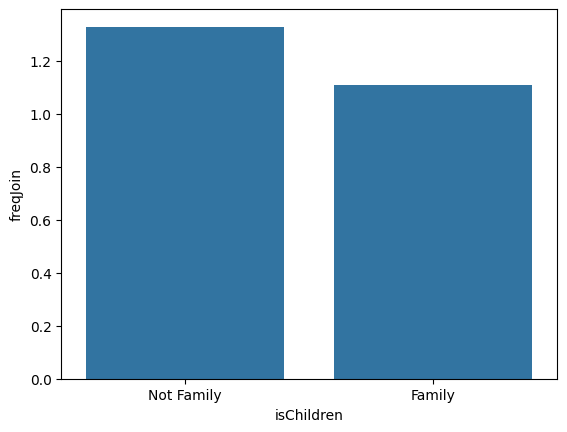

In [98]:
sns.barplot(prefam, x = 'isChildren', y = 'freqJoin')

Not Family Class tends to participate more in the campaign; meanwhile, Family is the lowest

* Most of the categories that took interest in the past campaigns were not the most potential pool of categories.
* This could be the cause why the campaign didn't catch much participant.

### Population Demography Summary

Graphs below are top potential category per demography
Taken from prior analysis.

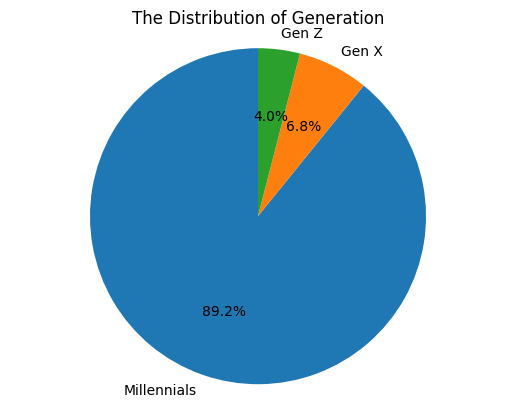

In [99]:
plt.pie(piegen['count'], labels=piegen['Generation'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('The Distribution of Generation')
plt.show()

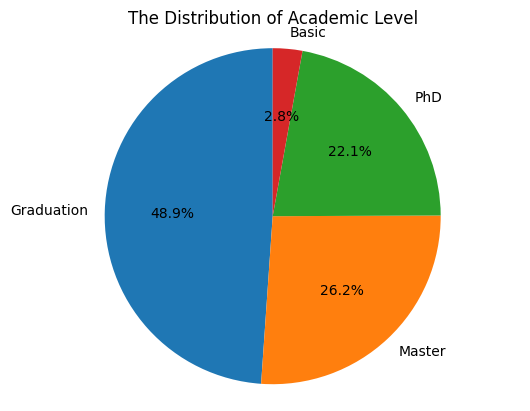

In [100]:
plt.pie(pieedu['count'], labels=pieedu['Academic_Level'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('The Distribution of Academic Level')
plt.show()

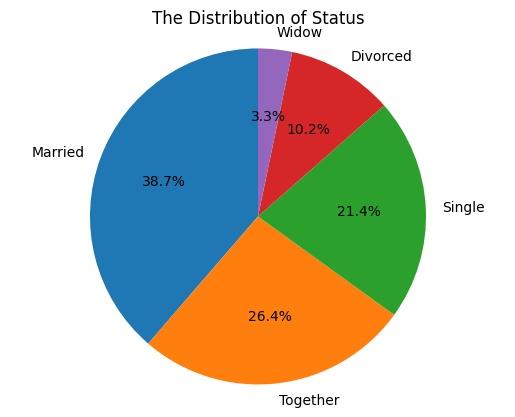

In [101]:
plt.pie(piestatus['count'], labels=piestatus['Status'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('The Distribution of Status')
plt.show()

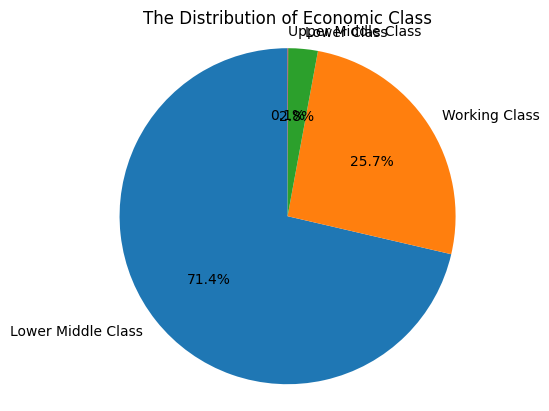

In [102]:
plt.pie(pieeco['count'], labels=pieeco['ecoClass'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('The Distribution of Economic Class')
plt.show()

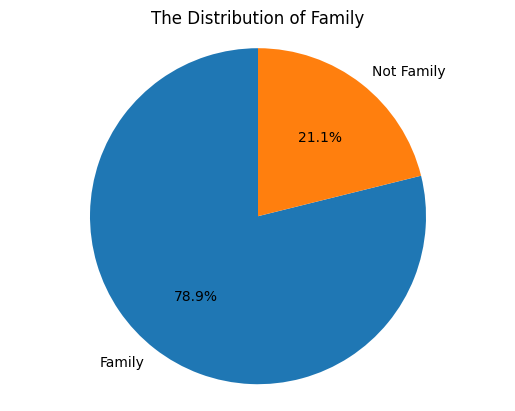

In [103]:
plt.pie(piefam['count'], labels=piefam['isChildren'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('The Distribution of Family')
plt.show()

**The Highest Proportion based on these graphs**
1. Millennials (89.2%)
2. Graduation (48.9%)
3. Married (38.7%) and Together (26.4%) = (65.1%)
4. Lower Middle Class (71.4%)
5. Family (78.9%)

Again, these categories are the most potential to be targeted if we want larger audience

#### Sample Demographic
Based on demographic conclusion, we already know which category that stands out per demography

Let's try to count the combination of each category.

In [104]:
dictComb = {'combination' : [],
            'countN' : []}

for i in df['Generation'].unique() :
    for k in df['Academic_Level'].unique() :
        for m in df['Status'].unique() :
            for n in df['ecoClass'].unique() :
                for o in df['isChildren'].unique() :
                    countN = df[(df['Generation'] == i)
                                    & (df['Academic_Level'] == k)
                                    & (df['Status'] == m)
                                    & (df['ecoClass'] == n)
                                    & (df['isChildren'] == o)]['ID'].count()
                    for p in dictComb :
                        if p == 'combination' :
                            dictComb[p].append([i , k , m , n , o])
                        else :
                            dictComb[p].append(countN)

dfComb = pd.DataFrame(dictComb)
dfComb.sort_values('countN', ascending=False)

,combination,countN
0,"[Millennials, Graduation, Married, Lower Middl...",177
16,"[Millennials, Graduation, Together, Lower Midd...",119
80,"[Millennials, PhD, Married, Lower Middle Class...",93
40,"[Millennials, Master, Married, Lower Middle Cl...",92
8,"[Millennials, Graduation, Single, Lower Middle...",87
...,...,...
226,"[Gen X, Master, Widow, Working Class, Family]",0
225,"[Gen X, Master, Widow, Lower Middle Class, Not...",0
223,"[Gen X, Master, Together, Upper Middle Class, ...",0
222,"[Gen X, Master, Together, Upper Middle Class, ...",0


if we get all the highest demographics combined, we only get 177 People at max

So, it better to make hierarchy or priority which Demography we should focus on more.

But, still the higest demography combined match the result from analysis per demography.

The priority should follow:

1. Millennials (89.2%)
2. Graduation (48.9%)
3. Married (38.7%) and Together (26.4%) = (65.1%)
4. Lower Middle Class (71.4%)
5. Family (78.9%)

### IS DISCOUNT NEED?
**Discount Overview**

Discount is important element to supermarket activity

We should consider whether discount can be integrated to the campaign

In [106]:
dictHaveDisc = {'isParticDisc' : ['Y','N'],
                'countDisc': [df[df['Num_Deals_Purchases'] != 0]['ID'].count(),df[df['Num_Deals_Purchases'] == 0]['ID'].count()]}

dfHaveDisc = pd.DataFrame(dictHaveDisc)
dfHaveDisc

,isParticDisc,countDisc
0,Y,1852
1,N,13


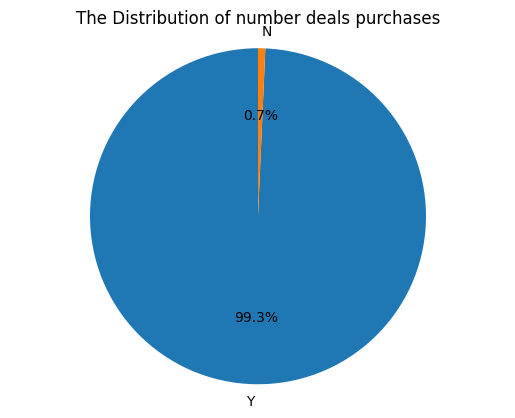

In [422]:
plt.pie(dfHaveDisc['countDisc'], labels=dfHaveDisc['isParticDisc'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('The Distribution of number deals purchases')
plt.show()

Discount might NEEDED because most of the population has ever bougth when price is discounted

In [424]:
discRate = (df['Num_Deals_Purchases'].sum() / df['frePurchase'].sum()) * 100
f'{round(discRate)}%'

'17%'

* But, based on ratio to purchase made, purchase on discount is quite small. Only 17% it means only 1 purchase made with discount out of 5 purchase. But, this could because the discounted items were not needed items by the population. So, not many purchase made with discount.
* We CAN'T conclude which product is the best based on this data because the data only tells amount spent on products (USD).  But we still can choose discounted products based on Demographics needs to boost participation in campaign.
* As we concluded before, discount can also made as a tool to target the audience.

## Channel of Purchase

numWebPurchase        1830
numCatalogPurchase    1295
numStorePurchase      1865
dtype: int64


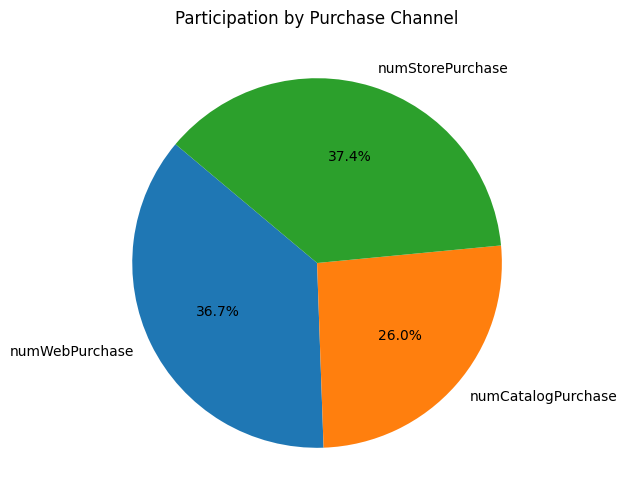

In [107]:
particChannel = pd.Series({
    'numWebPurchase': df[df['Num_Web_Purchases'] != 0]['ID'].count(),
    'numCatalogPurchase': df[df['Num_Catalog_Purchases'] != 0]['ID'].count(),
    'numStorePurchase': df[df['Num_Store_Purchases'] != 0]['ID'].count()
})

# Display the Series and plot the pie chart
print(particChannel)
plt.figure(figsize=(8, 6))
plt.pie(particChannel, labels=particChannel.index, autopct='%1.1f%%', startangle=140)
plt.title('Participation by Purchase Channel')
plt.show()

Web and Store is the most used channel of purchase

Num_Web_Purchases         7089.0
Num_Catalog_Purchases     3723.0
Num_Store_Purchases      10173.0
dtype: float64


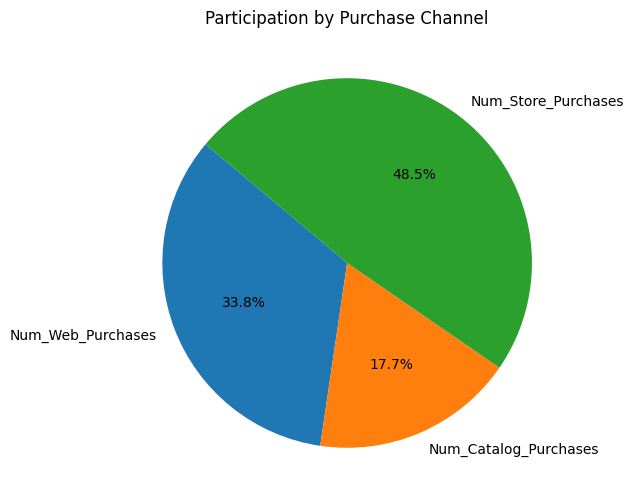

In [108]:
purchChannelAll = df[['Num_Web_Purchases','Num_Catalog_Purchases','Num_Store_Purchases']].sum()
# Display the Series and plot the pie chart
print(purchChannelAll )
plt.figure(figsize=(8, 6))
plt.pie(purchChannelAll , labels=purchChannelAll .index, autopct='%1.1f%%', startangle=140)
plt.title('Participation by Purchase Channel')
plt.show()

Store generates most purchase out of all channels.

,Generation,Num_Web_Purchases,Num_Catalog_Purchases,Num_Store_Purchases
0,Gen X,3.818898,2.267717,5.629921
1,Gen Z,3.520000,1.866667,5.200000
2,Millennials,3.812387,1.981359,5.452796


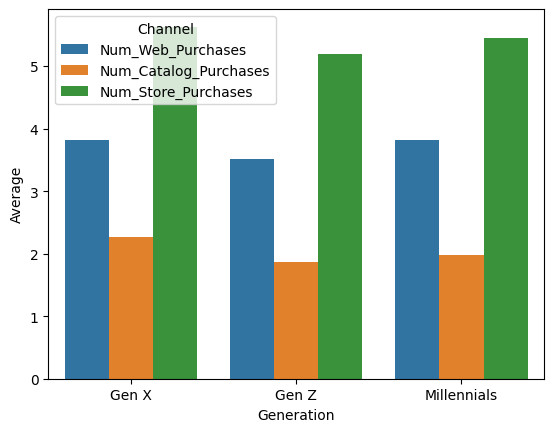

In [109]:
purchChannelGen = df.groupby('Generation')[['Num_Web_Purchases','Num_Catalog_Purchases','Num_Store_Purchases']].mean().reset_index()
sns.barplot(data = purchChannelGen.melt(id_vars = 'Generation',
                                        var_name = 'Channel',
                                        value_name = 'Average'),
            x = 'Generation',
            y = 'Average',
            hue = 'Channel')
purchChannelGen

,Academic_Level,Num_Web_Purchases,Num_Catalog_Purchases,Num_Store_Purchases
0,Basic,1.716981,0.452830,2.754717
1,Graduation,3.825658,1.959430,5.414474
2,Master,3.659836,1.959016,5.360656
3,PhD,4.182039,2.320388,6.002427


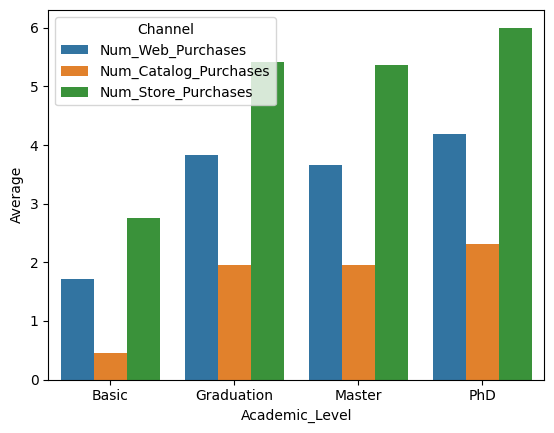

In [110]:
purchChannelEdu = df.groupby('Academic_Level')[['Num_Web_Purchases','Num_Catalog_Purchases','Num_Store_Purchases']].mean().reset_index()
sns.barplot(data = purchChannelEdu.melt(id_vars = 'Academic_Level',
                                        var_name = 'Channel',
                                        value_name = 'Average'),
            x = 'Academic_Level',
            y = 'Average',
            hue = 'Channel')
purchChannelEdu

,Status,Num_Web_Purchases,Num_Catalog_Purchases,Num_Store_Purchases
0,Divorced,4.136126,1.968586,5.534031
1,Married,3.797503,1.894591,5.482663
2,Single,3.470000,1.962500,5.265000
3,Together,3.857724,2.111789,5.434959
4,Widow,4.508197,2.573770,6.278689


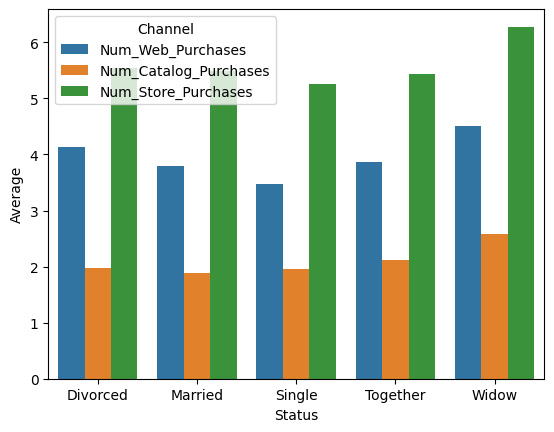

In [111]:
purchChannelSta = df.groupby('Status')[['Num_Web_Purchases','Num_Catalog_Purchases','Num_Store_Purchases']].mean().reset_index()
sns.barplot(data = purchChannelSta.melt(id_vars = 'Status',
                                        var_name = 'Channel',
                                        value_name = 'Average'),
            x = 'Status',
            y = 'Average',
            hue = 'Channel')
purchChannelSta

,ecoClass,Num_Web_Purchases,Num_Catalog_Purchases,Num_Store_Purchases
0,Lower Class,1.886792,0.490566,2.830189
1,Lower Middle Class,4.560481,2.625845,6.437265
2,Upper Middle Class,6.000000,8.000000,13.000000
3,Working Class,1.902083,0.404167,3.004167


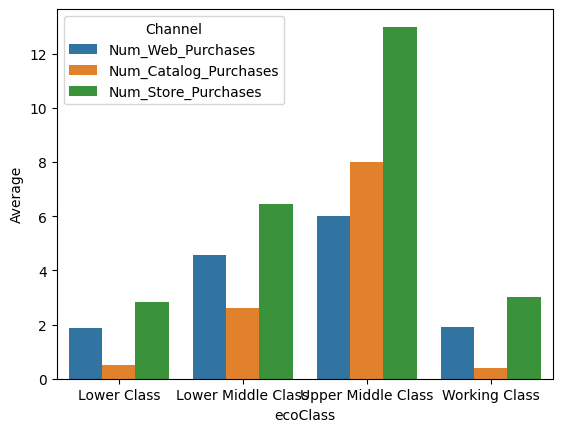

In [112]:
purchChannelEco = df.groupby('ecoClass')[['Num_Web_Purchases','Num_Catalog_Purchases','Num_Store_Purchases']].mean().reset_index()
sns.barplot(data = purchChannelEco.melt(id_vars = 'ecoClass',
                                        var_name = 'Channel',
                                        value_name = 'Average'),
            x = 'ecoClass',
            y = 'Average',
            hue = 'Channel')
purchChannelEco

,isChildren,Num_Web_Purchases,Num_Catalog_Purchases,Num_Store_Purchases
0,Family,3.712441,1.562203,5.029912
1,Not Family,4.131980,3.616751,7.040609


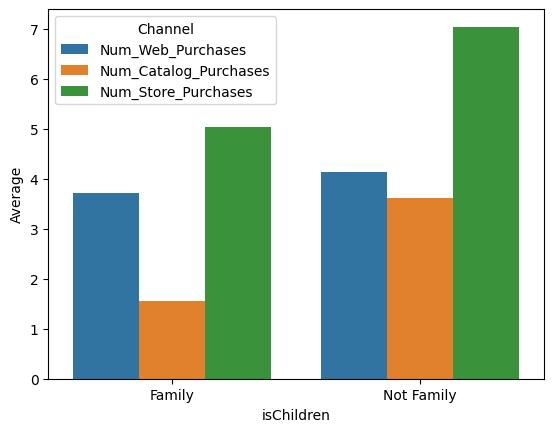

In [113]:
purchChannelFam = df.groupby('isChildren')[['Num_Web_Purchases','Num_Catalog_Purchases','Num_Store_Purchases']].mean().reset_index()
sns.barplot(data = purchChannelFam.melt(id_vars = 'isChildren',
                                        var_name = 'Channel',
                                        value_name = 'Average'),
            x = 'isChildren',
            y = 'Average',
            hue = 'Channel')
purchChannelFam

* Despite all demography classes, all favorites Store as channel of purchase.
Then followed by Web as their second choice of purchase channel.

* It means, we should mainly boost the campaign in store to attract more participant.
Then, if we have enough budget we can also consider web as secondary channel to boost our campaign.

* The grand design should still match the highest demography pool as always mentioned before.

## **OVERALL CONCLUSION AND RECOMMENDATION**
#### **Evaluation**
Based on demographic analysis (proportion and rate of participation), we know that the past campaigns did catch or focus more on:

* Generation: Millennials
* Education: 
* Marital: Single
* Economic Class: Lower Middle Class
* Family: Not Family

Based on discount analysis, discount might needed because almost everyone has ever bought in discount.
But, the ratio to purchase in total, the number is small 17% 

It could be because the discounted items didn't match the needs of the counsumer (only attracts Working Class and Family).
Meanwhile, Working Class is not the highest population among other Economic Classes.

Based on channel of purchase analysis, we find that despite of demography types, all most favored channel of purchase is Store, followed by Web.
#### **Conclusion**
Based on demographic analysis, we find that some categories has higher proportion of population than others.

The Highest Proportion of Population

1. Millennials (89.2%)
2. Graduation (48.9%)
3. Married (38.7%) and Together (26.4%) = (65.1%)
4. Lower Middle Class (71.4%)
5. Family (78.9%)

Again, these categories are the most potential to be targeted if we want larger audience
But we should have priority of which demography type we should aim more in the campaign and the priority is also ranked up in list above.
Because, if we combined those all (equally), we only get 177 participants at most. But still those combination is the highest among other combinations.

Discount can also be used to attract or target more participant because almost everyone has ever bought in discount.

Channel of purchase, despite of demography types, all favored Store as their main channel of purchase.

#### **Recommendation**
My main audience should be the Lower Middle Class, who has Family (kids / teens in home). We can also add touch of other demography types like Couple (Married and Together), Graduation, and Millennials to enhance our campaign more.

The discounted items should also meet the needs of our audience above, especially Lower Middle Class who has Family (kids / teens in home).

We should boost our campaign especially in Store.
Then, we can consider to also boost it at our Web as our secondary channel of purchase if we have enough budget.